## **libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## **Download data**

In [3]:
covid_19 = pd.read_csv('/content/full_grouped.csv')

## **Exploration Data Architecture (EDA)**
### ***Data display***

In [4]:
covid_19.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


### ***View general information***

In [5]:
covid_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [6]:
covid_19.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
count,3.515600e+04,35156.000000,3.515600e+04,3.515600e+04,35156.00000,35156.000000,35156.000000
mean,2.356663e+04,1234.068239,1.104813e+04,1.128443e+04,469.36375,18.603339,269.315593
std,1.499818e+05,7437.238354,6.454640e+04,8.997149e+04,3005.86754,115.706351,2068.063852
min,0.000000e+00,0.000000,0.000000e+00,-2.000000e+00,0.00000,-1918.000000,-16298.000000
25%,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
50%,2.500000e+02,4.000000,3.300000e+01,8.500000e+01,2.00000,0.000000,0.000000
75%,3.640250e+03,78.250000,1.286250e+03,1.454000e+03,75.00000,1.000000,20.000000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.00000,3887.000000,140050.000000


### ***Check for missing values***

In [7]:
covid_19.isnull().sum()

,0
Date,0
Country/Region,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0
WHO Region,0


### ***Check for duplicate values***

In [8]:
covid_19.duplicated().sum()

np.int64(0)

## **Core Analysis**
### ***Aesthetics by country***

In [52]:
top_confirmed = covid_19.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False).head(10)


In [53]:
top_deaths = covid_19.groupby('Country/Region')['Deaths'].max().sort_values(ascending=False).head(10)


In [54]:
top_recovered = covid_19.groupby('Country/Region')['Recovered'].max().sort_values(ascending=False).head(10)


In [55]:

# Convert Series to DataFrames
top_confirmed_df = top_confirmed.reset_index()
top_deaths_df = top_deaths.reset_index()
top_recovered_df = top_recovered.reset_index()

# Create 3 columns (subplots) in one row
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=[
        'Top 10 Confirmed Cases',
        'Top 10 Deaths',
        'Top 10 Recovered Cases'
    ]
)

## ---------Top 10 Countries with the Highest Number of Confirmed Cases---------

fig.add_trace(
    go.Bar(
        x=top_confirmed_df['Country/Region'],
        y=top_confirmed_df['Confirmed'],
        name='Confirmed',
        marker_color='skyblue'
    ),
    row=1, col=1
)

## ---------Top 10 Countries with the Highest Number of Deaths---------
fig.add_trace(
    go.Bar(
        x=top_deaths_df['Country/Region'],
        y=top_deaths_df['Deaths'],
        name='Deaths',
        marker_color='skyblue'
    ),
    row=1, col=2
)

## ---------Top 10 Countries with the Highest Number of Raecovered Cases---------
fig.add_trace(
    go.Bar(
        x=top_recovered_df['Country/Region'],
        y=top_recovered_df['Recovered'],
        name='Recovered',
        marker_color='skyblue'

    ),
    row=1, col=3
)

# Update format
fig.update_layout(
    title_text='COVID-19 Top 10 Countries: Confirmed, Deaths, and Recovered',
    showlegend=False,
    height=500, width=1000,
    xaxis_tickangle=-45,
    xaxis2_tickangle=-45,
    xaxis3_tickangle=-45

)

fig.show()


### ***For ratios (deaths/infections, recoveries/infections)***

In [58]:
latest = covid_19[covid_19['Date'] == covid_19['Date'].max()].copy()
latest = latest[latest['Confirmed'] > 0]  # Avoid division by zero

latest['Death_Rate'] = latest['Deaths'] / latest['Confirmed']
latest['Recovery_Rate'] = latest['Recovered'] / latest['Confirmed']



In [59]:
top_death_rate = latest.sort_values(by='Death_Rate', ascending=False).head(10)
top_recovery_rate = latest.sort_values(by='Recovery_Rate', ascending=False).head(10)


In [61]:


# Convert Series to DataFrames
top_death_rate_df = top_death_rate[['Country/Region', 'Death_Rate']].reset_index(drop=True)
top_recovery_rate_df = top_recovery_rate[['Country/Region', 'Recovery_Rate']].reset_index(drop=True)


fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=[
        'Top 10 Countries by Death Rate (%)',
        'Top 10 Countries by Recovery Rate (%)'
    ]
)

# ----------Drawing the highest mortality rates----------
fig.add_trace(
    go.Bar(
        x=top_death_rate_df['Country/Region'],
        y=top_death_rate_df['Death_Rate'] * 100,
        name='Death Rate (%)',
        marker_color='skyblue'
    ),
    row=1, col=1
)

# ----------Drawing the highest recovery rates----------
fig.add_trace(
    go.Bar(
        x=top_recovery_rate_df['Country/Region'],
        y=top_recovery_rate_df['Recovery_Rate'] * 100,
        name='Recovery Rate (%)',
        marker_color='skyblue'
    ),
    row=1, col=2
)

# Update format
fig.update_layout(
    title_text='COVID-19: Death vs Recovery Rates by Country (Top 10)',
    showlegend=False,
    height=500, width=1000,
    xaxis_tickangle=-45,
    xaxis2_tickangle=-45
)

fig.show()


### ***Analysis of days***

In [62]:
top_days_cases = covid_19.sort_values(by='New cases', ascending=False).head(10)
top_days_deaths = covid_19.sort_values(by='New deaths', ascending=False).head(10)
top_days_recovered = covid_19.sort_values(by='New recovered', ascending=False).head(10)


In [64]:
top_days_cases = covid_19.sort_values(by='New cases', ascending=False).head(10)
top_days_deaths = covid_19.sort_values(by='New deaths', ascending=False).head(10)
top_days_recovered = covid_19.sort_values(by='New recovered', ascending=False).head(10)


In [68]:
# Add a title containing the country and date
top_days_cases['Label'] = top_days_cases['Country/Region'] + ' - ' + top_days_cases['Date'].astype(str)
top_days_deaths['Label'] = top_days_deaths['Country/Region'] + ' - ' + top_days_deaths['Date'].astype(str)
top_days_recovered['Label'] = top_days_recovered['Country/Region'] + ' - ' + top_days_recovered['Date'].astype(str)


# Create 3 columns (subplots) in one row
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=[
        'Top 10 Days by New Cases',
        'Top 10 Days by New Deaths',
        'Top 10 Days by New Recovered'
    ]
)

# ---------New injuries---------
fig.add_trace(
    go.Bar(
        x=top_days_cases['Label'],
        y=top_days_cases['New cases'],
        name='New Cases',
        marker_color='skyblue'
    ),
    row=1, col=1
)

# ----------New deaths----------
fig.add_trace(
    go.Bar(
        x=top_days_deaths['Label'],
        y=top_days_deaths['New deaths'],
        name='New Deaths',
        marker_color='skyblue'
    ),
    row=1, col=2
)

# ----------New recovery cases---------
fig.add_trace(
    go.Bar(
        x=top_days_recovered['Label'],
        y=top_days_recovered['New recovered'],
        name='New Recovered',
        marker_color='skyblue'
    ),
    row=1, col=3
)


fig.update_layout(
    title_text='Top 10 Days: New Cases, Deaths, and Recoveries',
    showlegend=False,
    height=500, width=1000,
    xaxis_tickangle=-45,
    xaxis2_tickangle=-45,
    xaxis3_tickangle=-45
)

fig.show()

####  ***For ratios (deaths/infections, recoveries/infections)***

In [69]:
df_nonzero = covid_19[covid_19['New cases'] > 0].copy()
df_nonzero['Death_Rate'] = df_nonzero['New deaths'] / df_nonzero['New cases']
df_nonzero['Recovery_Rate'] = df_nonzero['New recovered'] / df_nonzero['New cases']


In [70]:
top_death_rate_days = df_nonzero.sort_values(by='Death_Rate', ascending=False).head(10)
top_recovery_rate_days = df_nonzero.sort_values(by='Recovery_Rate', ascending=False).head(10)


In [74]:

top_death_rate_days['Label'] = top_death_rate_days['Country/Region'] + ' - ' + top_death_rate_days['Date'].astype(str)
top_recovery_rate_days['Label'] = top_recovery_rate_days['Country/Region'] + ' - ' + top_recovery_rate_days['Date'].astype(str)


fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=[
        'Top 10 Days by Daily Death Rate (%)',
        'Top 10 Days by Daily Recovery Rate (%)'
    ]
)

# ----------Daily death rates----------
fig.add_trace(
    go.Bar(
        x=top_death_rate_days['Label'],
        y=top_death_rate_days['Death_Rate'] * 100,
        name='Death Rate',
        marker_color='skyblue'
    ),
    row=1, col=1
)

# ----------Daily recovery rates----------
fig.add_trace(
    go.Bar(
        x=top_recovery_rate_days['Label'],
        y=top_recovery_rate_days['Recovery_Rate'] * 100,
        name='Recovery Rate',
        marker_color='skyblue'
    ),
    row=1, col=2
)

fig.update_layout(
    title_text='Top 10 Days by Daily Death and Recovery Rates (Relative to New Cases)',
    showlegend=False,
    height=500,width=1000,
    xaxis_tickangle=-45,
    xaxis2_tickangle=-45
)

fig.show()

### The development of infections in Egypt




In [79]:
country = 'Egypt'
df_country = covid_19[covid_19['Country/Region'] == country]

df_melted = df_country.melt(
    id_vars=['Date'],
    value_vars=['Confirmed', 'Deaths', 'Recovered'],
    var_name='Status',
    value_name='Count'
)


fig = px.line(
    df_melted,
    x='Date',
    y='Count',
    color='Status',
    title=f'COVID-19 Trends Over Time in {country}'
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Number of Cases',
    xaxis_tickangle=45
)

fig.show()

## **By geographical area**

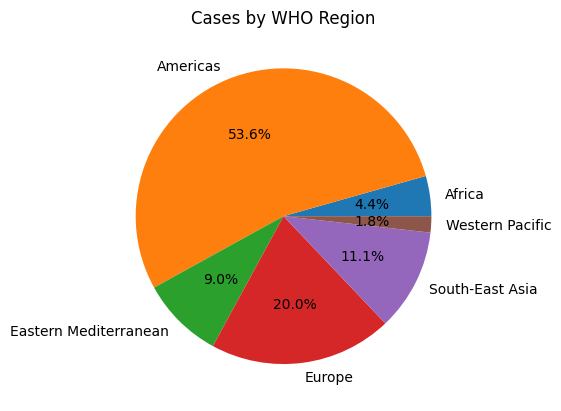

In [81]:
region_summary = latest.groupby('WHO Region')['Confirmed'].sum()
region_summary.plot.pie(autopct='%1.1f%%', title='Cases by WHO Region')
plt.ylabel('')
plt.show()
